# Exercises on Sequence Mining

In [1]:
import re
import numpy as np
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt
import tabulate

import sys
sys.path.append('../utilities')
from utilities.load_data import load_dblp_citations, load_city_tour

**Things to tell when the session starts:**  
1. For the first, you can do it faster than the k-segmentation problem!

## Exercise 1 - Min-hashing

Consider the following matrix:

<table bgcolor="navajowhite" border="5">
<tbody><tr>
<th> </th>
<th>C1</th>
<th>C2</th>
<th>C3</th>
<th>C4</th>
</tr>
<tr>
<td>R1</td>
<td>0</td>
<td>1</td>
<td>1</td>
<td>0</td>
</tr>
<tr>
<td>R2</td>
<td>1</td>
<td>0</td>
<td>1</td>
<td>1</td>
</tr>
<tr>
<td>R3</td>
<td>0</td>
<td>1</td>
<td>0</td>
<td>1</td>
</tr>
<tr>
<td>R4</td>
<td>0</td>
<td>0</td>
<td>1</td>
<td>0</td>
</tr>
<tr>
<td>R5</td>
<td>1</td>
<td>0</td>
<td>1</td>
<td>0</td>
</tr>
<tr>
<td>R6</td>
<td>0</td>
<td>1</td>
<td>0</td>
<td>0</td>
</tr>
</tbody></table>

1. Compute the min-hashing value of each of the rows with the permutation: R4, R6, R1, R3, R5, R2. Which of the following statements are true? _Note:_ we give the minhash value in terms of the original name of the row, rather than the order of the row in the permutation.

 - The minhash value for C1 is R5
 - The minhash value for C4 is R2
 - The minhash value for C1 is R2
 - The minhash value for C2 is R1

2. Given a data matrix and a permutation return the min-hashing values for each of the columns. 

In [7]:
data = np.array([
    [0, 1, 1, 0],
    [1, 0, 1, 1],
    [0, 1, 0, 1],
    [0, 0, 1, 0],
    [1, 0, 1, 0],
    [0, 1, 0, 0],
])

permutation = np.array([3,5,0,2,4,1])

def signature(data, permutation):
    sign = np.full(np.shape(data)[1], None)
    #print(sign)
    
    ### YOUR CODE HERE
    for row_idx, perm in enumerate(permutation):
        for col_idx, col in enumerate(data[perm]): 
            if col == 1 and (sign[col_idx] == None or sign[col_idx] > perm): 
                sign[col_idx] = perm                             
    ### YOUR CODE HERE 
    return sign

sign = signature(data, permutation)
print()
print(sign, "\n")

print("The minhash value for C1 is R5: {0}".format(sign[0] == 4))
print("The minhash value for C4 is R2: {0}".format(sign[3] == 1))
print("The minhash value for C1 is R2: {0}".format(sign[0] == 1))
print("The minhash value for C2 is R1: {0}".format(sign[1] == 0))

[0 1 1 0]
[None None None None]
[None 3 None None]
[None 3 3 None]
[None 3 3 None]
[1 0 1 1]
[5 3 3 None]
[5 3 3 None]
[5 3 3 None]
[5 3 3 5]
[0 1 0 1]
[5 3 3 5]
[5 0 3 5]
[5 0 3 5]
[5 0 3 0]
[0 0 1 0]
[5 0 3 0]
[5 0 3 0]
[5 0 2 0]
[5 0 2 0]
[1 0 1 0]
[4 0 2 0]
[4 0 2 0]
[4 0 2 0]
[4 0 2 0]
[0 1 0 0]
[4 0 2 0]
[4 0 2 0]
[4 0 2 0]
[4 0 2 0]

[4 0 2 0] 

The minhash value for C1 is R5: True
The minhash value for C4 is R2: False
The minhash value for C1 is R2: False
The minhash value for C2 is R1: True


### Exercise 2 - Locality Sentity Hashing

Here is a matrix representing the signatures of seven columns, C1 through C7.

<table bgcolor="floralwhite" border="5">
<tbody><tr>
<th>C1 </th>
<th>C2 </th>
<th>C3 </th>
<th>C4 </th>
<th>C5 </th>
<th>C6 </th>
<th>C7 </th>
</tr>
<tr>
<td>1 </td>
<td>2 </td>
<td>1 </td>
<td>1 </td>
<td>2 </td>
<td>5 </td>
<td>4 </td>
</tr>
<tr>
<td>2 </td>
<td>3 </td>
<td>4 </td>
<td>2 </td>
<td>3 </td>
<td>2 </td>
<td>2 </td>
</tr>
<tr>
<td>3 </td>
<td>1 </td>
<td>2 </td>
<td>3 </td>
<td>1 </td>
<td>3 </td>
<td>2 </td>
</tr>
<tr>
<td>4 </td>
<td>1 </td>
<td>3 </td>
<td>1 </td>
<td>2 </td>
<td>4 </td>
<td>4 </td>
</tr>
<tr>
<td>5 </td>
<td>2 </td>
<td>5 </td>
<td>1 </td>
<td>1 </td>
<td>5 </td>
<td>1 </td>
</tr>
<tr>
<td>6 </td>
<td>1 </td>
<td>6 </td>
<td>4 </td>
<td>1 </td>
<td>1 </td>
<td>4 </td>
</tr>
</tbody></table>

Suppose we use locality-sensitive hashing with three bands of two rows each. Assume there are enough buckets available that the hash function for each band can be the identity function (i.e., columns hash to the same bucket if and only if they are identical in the band). Find all the candidate pairs, and then identify one of them in the list below.

 - C1 and C3
 - C1 and C2
 - C1 and C5
 - C5 and C6


In [1]:
data = [
    [1, 2, 1, 1, 2, 5, 4],
    [2, 3, 4, 2, 3, 2, 2],
    [3, 1, 2, 3, 1, 3, 2],
    [4, 1, 3, 1, 2, 4, 4],
    [5, 2, 5, 1, 1, 5, 1],
    [6, 1, 6, 4, 1, 1, 4]
]

potential_pairs = []

### YOUR CODE HERE
for band_index in range(0, 3):
    row1 = data[band_index * 2]
    row2 = data[band_index * 2 + 1]
    
    for c1_index in range(0, 7):
        for c2_index in range(c1_index + 1, 7):
            if row1[c1_index] == row1[c2_index] and row2[c1_index] == row2[c2_index]:
                potential_pairs.append("C{a}-C{b}".format(a = c1_index + 1, b = c2_index + 1))
### YOUR CODE HERE
                
                
print(potential_pairs)


['C1-C4', 'C2-C5', 'C1-C6', 'C1-C3', 'C4-C7']


### Exercise 3 - Shingling

Find the set of 2-shingles for the "document": **ABRACADABRA**
and also for the "document": **BRICABRAC**

Answer the following questions:

 - How many 2-shingles does ABRACADABRA have?
 - How many 2-shingles does BRICABRAC have?
 - How many 2-shingles do they have in common?
 - What is the Jaccard similarity between the two documents"?

Then, find the true statement in the list below:

 - BRICABRAC has 4 2-shingles.
 - The Jaccard similarity is 5/7.
 - ABRACADABRA has 7 2-shingles.
 - ABRACADABRA has 10 2-shingles.

In [8]:
doc1 = "ABRACADABRA"
doc2 = "BRICABRAC"

def perf_shingles(doc, size):
    unique_shingles = []
    for i in range(len(doc) - size + 1):
        shingle = doc[i:(i + size)]
        if shingle not in unique_shingles:
            unique_shingles.append(shingle)
    return unique_shingles

def array_intersection(a, b):
    intersection = []
    
    for val in a:
        if val in b:
            if val not in intersection:
                intersection.append(val)
    
    return intersection
        

def array_union(a, b):
    union = a.copy()
    '''for val in a:
        if val not in union:
            union.append(val)'''
            
    for val in b:
        if val not in union:
            union.append(val)
    return union
    
doc1_2_shingles = perf_shingles(doc1, 2)
doc2_2_shingles = perf_shingles(doc2, 2)

doc_intersection = array_intersection(doc1_2_shingles, doc2_2_shingles)
doc_union = array_union(doc1_2_shingles, doc2_2_shingles)

print("{0} 2 shingles: {1}".format(doc1, doc1_2_shingles))
print("{0} 2 shingles: {1}".format(doc2, doc2_2_shingles))
print("Shingles intersection: {0}".format(doc_intersection))
print("Shingles union: {0} \n".format(doc_union))


print("How many 2-shingles does ABRACADABRA have?: {0}".format(len(doc1_2_shingles)))
print("How many 2-shingles does BRICABRAC have?: {0}".format(len(doc2_2_shingles)))
print("How many 2-shingles do they have in common?: {0}".format(len(doc_intersection)))
print("What is the Jaccard similarity between the two documents?: {0}/{1}\n".format(len(doc_intersection), len(doc_union)))

print("BRICABRAC has 4 2-shingles: {0}".format(len(doc2_2_shingles) == 4))
print("The Jaccard similarity is 5/7: {0}".format(len(doc_intersection) / len(doc_union) == 5 / 7))
print("ABRACADABRA has 7 2-shingles: {0}".format(len(doc1_2_shingles) == 7))
print("ABRACADABRA has 10 2-shingles: {0}".format(len(doc1_2_shingles) == 10))
        

ABRACADABRA 2 shingles: ['AB', 'BR', 'RA', 'AC', 'CA', 'AD', 'DA']
BRICABRAC 2 shingles: ['BR', 'RI', 'IC', 'CA', 'AB', 'RA', 'AC']
Shingles intersection: ['AB', 'BR', 'RA', 'AC', 'CA']
Shingles union: ['AB', 'BR', 'RA', 'AC', 'CA', 'AD', 'DA', 'RI', 'IC'] 

How many 2-shingles does ABRACADABRA have?: 7
How many 2-shingles does BRICABRAC have?: 7
How many 2-shingles do they have in common?: 5
What is the Jaccard similarity between the two documents?: 5/9

BRICABRAC has 4 2-shingles: False
The Jaccard similarity is 5/7: False
ABRACADABRA has 7 2-shingles: True
ABRACADABRA has 10 2-shingles: False


In [7]:
np.full(len(data), None)

array([None, None, None, None, None, None], dtype=object)

## Exercise 4 - Sequence Segmentation
Eurail is designing a new collaborative schedule of itineraries between Lisbon and Stockholm. 
As part of the design, they are facing the following problem: 

We are given a sequence of $N$ cities along the itinerary. 
We need to divide this set of cities into groups of consecutive cities, such that each group contains at least $k$ cities, and the _total sum of the distances_ between the first and the last city in a group, summing over all groups, is **minimized** (note: only the first and the last city in each group matters when calculating this sum of distances).

Assume a generic distance function $dist(city_A, city_B)$ is given.

Design a scheme that quickly finds the best possible division of cities in groups under this minimization objective. 
- Try to make your algorithm as efficient as possible. 
- Provide a complexity expression for it and implement it.

Assume that you have a distance matrix $D \in \mathbb{R}^{n \times n}$, such that $D_{i,j}$ is the distance from city $c_i$ to city $c_j$ (along the itinerary).
Note, that $D$ can be computed in $O(n^2)$, which is faster than the following part, i.e., it is okay to do.
Then we can construct $A \in \mathbb{R}^{\lfloor \frac{n}{K} \rfloor \times n}$ (similar to slides) as illustrated in Figure 1. 

The invariant in $A$ is that every entry of $A$ has the error of the best segmentation with at least $K$ elements in each segment. 
Rows are still number of segments, columns are still length of path. 

**Step 1:**   
First initialize the "skew diagonal" (orange cells in the illustration), which is easy. 
Say K=3, then A[1, 3] has exactly one segment of size 3 (c_1 - c_3), A[2, 6] has the segment from A[1, 3] and another segment of size 3 (t4-t6), etc.

**Step 2:**  
When filling in the rest of the "upper triangle," one needs to only consider the elements from the previous rows that are at least $K$ cities away (blue region for the red cell), such that it is a "legal action" to join the remaining cities.

The error function in this case is going to be 
$$
E(i, k) = min_{j: k \leq j \leq i - \color{blue}{K}} \left\{ E(j, k-1) + \color{blue}{D_{c_{j+1}, c_i}} \right\}
$$

Note that computing $E(i, k)$ takes only $O(n)$, since we can look up distances in $D$.

**Step 3:**  
Having filled in the whole table, one selects the minimum in the right most column of A (green box) and constructs the segments from there (having stored pointers to partial results as suggested in slides, of course).

<div style="margin: 0 auto; padding: 1em; text-align: center; max-width: 500px;">
    <img src="graphics/dynamic-programming.png" />
    <p><b>Figure 1</b> Dynamic programming table for the given problem. Orange points are the "skew diagonal," red point is an example of "receptive field" (blue cells), when filling that cell and the green box is the solutions to consider, when choosing the best segmentation.</p>
</div>

**Complexity analysis:**  
We need to fill a table, which has $O(\frac{n}{K} \cdot n) = O(\frac{n^2}{K})$ entries, where each entry takes $O(n)$ to fill so the total running-time is $O(\frac{n^3}{K})$

### Refinement
There are two additional observations to be made. 
1. The blue box in Figure 1 can be shrunken down to only consider $j$ in the range $[i-2K+1 ; i-K]$, since if there are $2K$ or more elements in a segment, it cannot hurt to split them into two segments of size $K$.

2. We have no constraints on how many segments we need so we actually don't need multiple rows in $A$ to keep track of how many segments are used.
    In other words, the recursive error becomes
    $$
        \color{blue}{E}(i)A = min_{j: \color{blue}{i-2K+1} \leq j \leq i-K} \left\{ E(j) + D_{c_{j+1}, c_{i}} \right\}
    $$

Using these two optimizations, we can get along with constructing only 1 row in $A$ and computing each cell in $O(K)$, which gives a running time of $O(nK)$ in total.

In [9]:
cities, distances = load_city_tour()
# cities is i list of city names
# distances is a distance matris, such that distances[i, j] is the distance from cities[i] to cities[j]

/Users/mke/AarhusUniversity/Datamining/dm2023-solutions/exercises/utilities/data/city_distances.txt


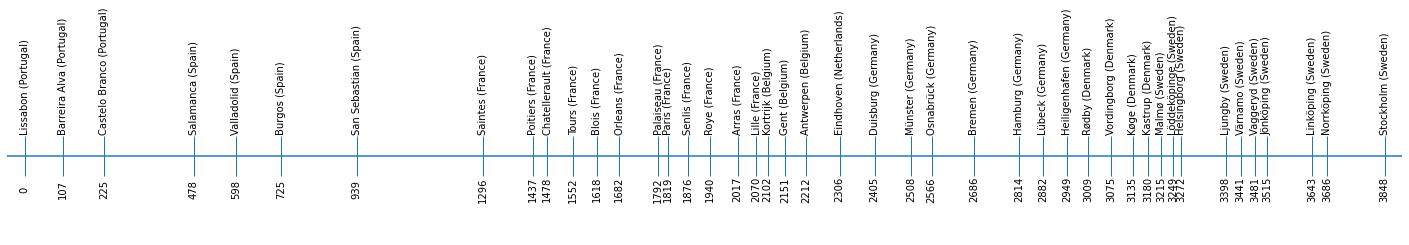

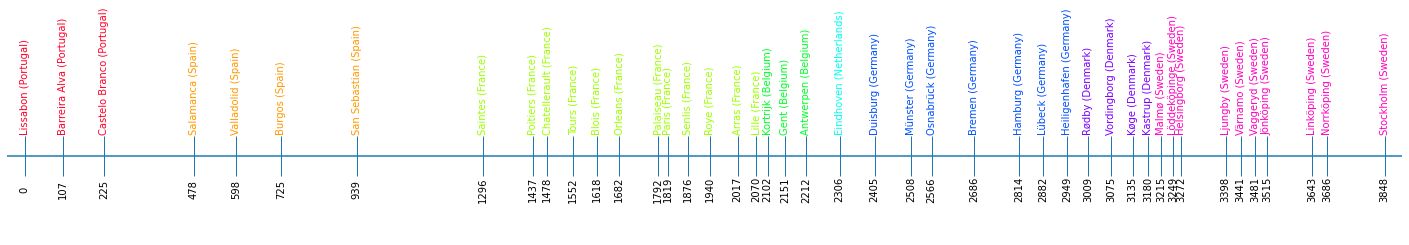

In [11]:
def plot_cities(clusters):
    """
        Function to plot partitioning of the cities.
    """
    d = distances[0]
    dmin = d.min() - 50
    dmax = d.max() + 50

    fig, ax = plt.subplots(figsize=(25,3))

    ax.hlines(1,dmin,dmax)  # Draw a horizontal line
    ax.set_xlim(dmin,dmax)
    ax.set_ylim(0.5,1.5)

    y = np.ones(np.shape(d))   # Make all y values the same
    ax.plot(d,y,'|',ms = 40)  # Plot a line at each location specified in a

    # uniques = np.unique()
    cmap = plt.get_cmap('gist_rainbow')
    uniques = np.unique(clusters)
    if len(uniques) == 1: cdict = dict.fromkeys(uniques, [0., 0., 0.])
    else: 
        cdict = {}
        for i, u in enumerate(uniques):
            cdict[u] = cmap(float(i) / (len(uniques)-1))
    
    for c, pos, cl in zip(cities, d, clusters):
        color = cdict[cl]
        ax.text(pos, 1.15, c, rotation=90, horizontalalignment='center', color=color)
        ax.text(pos, 0.80, "%.0f" % pos, rotation=90, verticalalignment='center', horizontalalignment='center', color=[0., 0., 0.])

    ax.axis('off')
    plt.show()

# Examples of how to plot clusters
# 1: Plot all clusters with same color.
plot_cities(np.zeros((len(cities),)))

# 2: Plos cities according to their country
countries = ["Portugal", "Spain", "France", "Belgium", "Netherlands", "Germany", "Denmark", "Sweden"]
country_dict = {s: i for i, s in enumerate(countries)}
# Extract country from city "name" and look up the cluster in the `country_dict`.
clusters = [country_dict[re.findall('\((\w+)\)', c)[0]] for c in cities]
 
plot_cities(clusters)

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  2  2  2  2  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
   6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6]
 [ 0  0  1  2  3  4  5  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
   6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6]
 [ 0  0  0  2  3  4  5  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
   6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6]
 [ 0  0  0  0  3  4  5  6  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7
   7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7 42]
 [ 0  0  0  0  0  4  5  6  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7
   7  7  7 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 42]
 [ 0  0  0  0  0  0  5  6  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7
   7  7  7 26 26 26 26 26 26 26 26 26 26 26 26 26 26 40 40 42]
 [ 0  0  0  0  0  0  0  6  7  7  7  7  7 

/var/folders/1b/3878ty_55zg95slw719pv9x00000gn/T/ipykernel_4461/1292901604.py:45: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  pointers = np.zeros((K, n), dtype=np.int) # There can at most be n//K segments, if all segments need to be of at least size K
/var/folders/1b/3878ty_55zg95slw719pv9x00000gn/T/ipykernel_4461/1292901604.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use

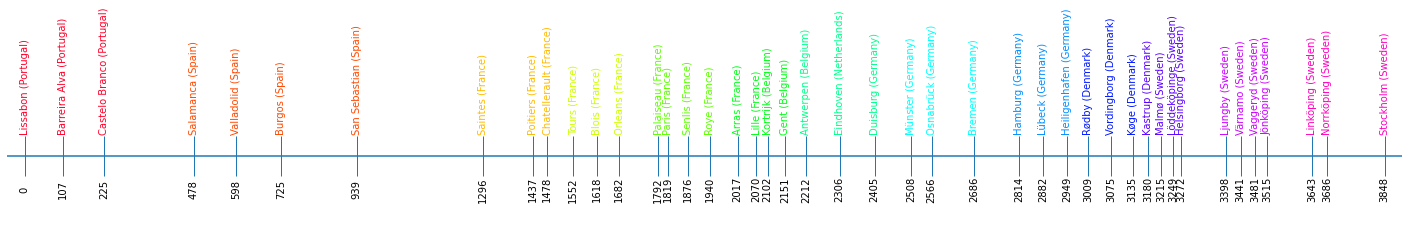

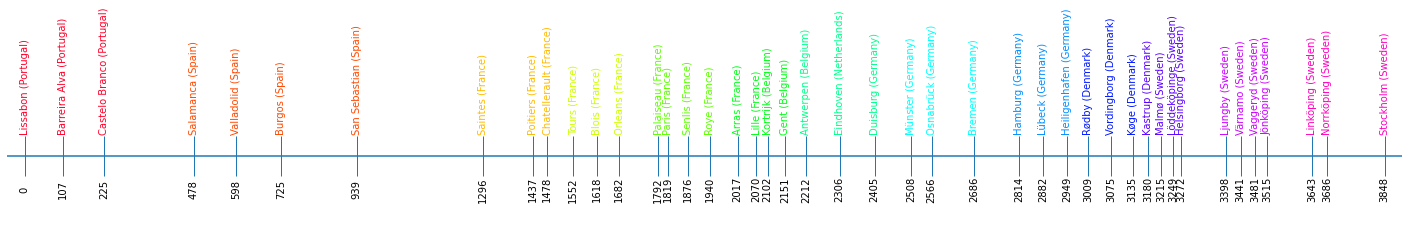

In [18]:
def sequence_segmentation_fast(distances, K=3):
    # distances = distances[0]
    d = lambda i, j: np.abs(distances[j] - distances[i])
    n = distances.shape[0]
    A = np.full(n, np.Infinity)
    pos = np.full(n, -1, dtype=np.int)
    
    for i in range(K-1, n):
        A[i] = d(0, i)
        for j in range(i-2*K+1, i-K+1):
            if j < K-1: continue
            err = A[j] + d(j+1, i)
            if A[i] > err:
                A[i] = err
                pos[i] = j
    
    path = [n-1]
    curr = pos[-1]
    while curr >= 0:
        path.append(curr)
        curr = pos[curr]
        
    path = path[::-1] # Reverse
        
    # Build clusters
    clusters = []
    i = 0
    k = 0
    for p in path:
        while i <= p:
            clusters.append(k)
            i += 1
        k += 1
    while i < distances.shape[0]:
        clusters.append(k)
        i += 1
        
    return clusters

def sequence_segmentation_all(distances, K=3):
    d = lambda i, j: np.abs(distances[j] - distances[i])
    
    n = distances.shape[0]
    A = np.zeros((K, n))
    pointers = np.zeros((K, n), dtype=np.int) # There can at most be n//K segments, if all segments need to be of at least size K
        
    # Initialize first row
    A[0,:]  = distances
    
    for l in range(1, K):
        pointers[l, l] = l-1
    
    # `l` is row we are filling
    # `j` is col to start from
    # `k` is col we are currently computing
    # `i` is the variable that is minimized over
    # `start` is the first entry in A[l-1] that we are allowed to look in.
    for l in range(1, K):
        j = l+1
        start = l-1
        for k in range(j, n):
            m_err = np.Infinity
            m_i   = -1
            for i in range(start, k):
                err = A[l-1, i] + d(i+1, k)
                if m_err > err:
                    m_err = err
                    m_i = i
            A[l, k] = m_err
            pointers[l, k] = m_i
    
    print(pointers)
    print(A)
    min_l = np.argmin(A[:,-1]) # Choose the smallest error in the last column.
    path = []
    
    # Build segment path
    k = n-1
    l = min_l
    while l >= 0:
        path.append(k)
        k = pointers[l, k]
        l -= 1
    path = path[::-1] # Reverse
        
    # Build clusters
    clusters = []
    i = 0
    k = 0
    for p in path:
        while i <= p:
            clusters.append(k)
            i += 1
        k += 1
    while i < distances.shape[0]:
        clusters.append(k)
        i += 1
        
    return clusters


def sequence_segmentation(distances, K=3):
    d = lambda i, j: np.abs(distances[j] - distances[i])
    
    n = distances.shape[0]
    A = np.zeros((n//K, n))
    pointers = np.zeros((n//K, n), dtype=np.int) # There can at most be n//K segments, if all segments need to be of at least size K
    print(pointers)
    A[:,:K-1] = np.Infinity
    # Initialize first row
    A[0,K-1:]  = distances[K-1:]
    # Initialize "diagonal".
    # Say K=3, and we consider A[2, 6] (2 groups and 6 points in total)
    # then we will have [t1, t2, t3] [t4, t5, t6]. So the "skew" diagonal
    # will be easy to compute.
    # | .  .  [] .  .  .  .  .  .  |
    # | .  .  .  .  .  [] .  .  .  |
    # | .  .  .  .  .  .  .  .  [] |
    for l in range(1, n//K):
        j_ = l*K - 1                               # Previous j
        j = (l+1)*K - 1                            # Current  j
        A[l, j] = d(j-K+1, j) + A[l-1, j_] # Error
        pointers[l, j] = j_
    
    # `l` is row we are filling
    # `j` is col to start from
    # `k` is col we are currently computing
    # `i` is the variable that is minimized over
    # `start` is the first entry in A[l-1] that we are allowed to look in.
    for l in range(1, n//K):
        j = (l+1)*K   # Start right after "diagonal"
        start = j - K - 1
        for k in range(j, n):
            m_err = np.Infinity
            m_i   = -1
            for i in range(start, k-K+1):
                err = A[l-1, i] + d(i+1, k)
                if m_err > err:
                    m_err = err
                    m_i = i
            A[l, k] = m_err
            pointers[l, k] = m_i
    
    min_l = np.argmin(A[:,-1]) # Choose the smallest error in the last column.
    path = []
    # Build segment path
    k = n-1
    l = min_l
    while l >= 0:
        path.append(k)
        k = pointers[l, k]
        l -= 1
    path = path[::-1] # Reverse
        
    # Build clusters
    clusters = []
    i = 0
    k = 0
    for p in path:
        while i <= p:
            clusters.append(k)
            i += 1
        k += 1
    '''while i < distances.shape[0]:
        clusters.append(k)
        i += 1'''
        
    return clusters

# d_ = distances[:10, :10]
d_ = distances[0]
import time
t0 = time.time()
clust1 = sequence_segmentation_all(d_, K=8)
print("All: ", time.time() - t0)
t0 = time.time()
clust1 = sequence_segmentation_fast(d_)
print("Fast: ", time.time() - t0)
t0 = time.time()
clust2 = sequence_segmentation(d_, K=3)
print("Slow: ", time.time() - t0)

plot_cities(clust1)
plot_cities(clust2)

In [122]:
# Speed test
r1 = []
r2 = []
sizes = [2**i for i in range(4, 18)]
for size in sizes: 
    dists = np.random.rand(size)
    dists = np.sort(dists)
    dists[0] = 0

    d_ = dists

    print('- - - ' + str(size) + ' - - -- - --')
    t0 = time.time()
    clust1 = sequence_segmentation_fast(d_)
    t1 = time.time() - t0
    r1.append(t1)
    if size < 2**10:
        t0 = time.time()
        clust2 = sequence_segmentation(d_, K=3)
        t2 = time.time() - t0
        print("%d\t%Fast: 10.4f\tSlow: %10.4f" % (size, t1, t2))
        r2.append(t2)
    else: r2.append(r2[-1])
    

2097152


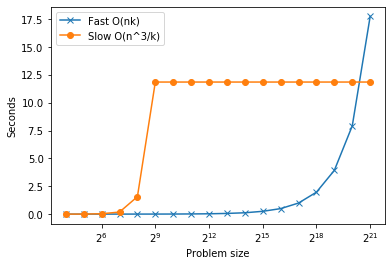

In [135]:
fig, ax = plt.subplots()

width = 18
ax.plot(sizes[:width], r1[:width], '-x', label="Fast O(nk)")
ax.plot(sizes[:width], r2[:width], '-o', label="Slow O(n^3/k)")
ax.legend()
ax.set_xscale('log', basex=2)
ax.set_ylabel('Seconds')
ax.set_xlabel('Problem size')
print(sizes[width-1])

In [123]:
print(len(r1))

18
